# Test de trayectorias

In [1]:
# importar librerias
import time
import numpy as np
import matplotlib.pyplot as plt
import mujoco_py

from RobotEnv.tools import simulation
from RobotEnv.tools.controllers import Manipulator_Agent
from RobotEnv.tools.logger import Logger

import glfw


Creating window glfw
no se pudo alcanzar el target en: 2499 pasos 4.998 seg
no se pudo alcanzar el target en: 2499 pasos 4.998 seg
no se pudo alcanzar el target en: 2499 pasos 4.998 seg
no se pudo alcanzar el target en: 2499 pasos 4.998 seg
no se pudo alcanzar el target en: 2499 pasos 4.998 seg


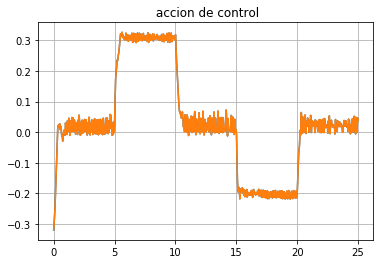

In [2]:
def main():
    #simulator
    sim = simulation.create_simulation("robotModelV2.xml")

    #controller
    controller = Manipulator_Agent("../agents_old/ddpg4/pyt_save/model.pt", sim, 4, render=True)
    # controller = Manipulator_Agent("./agents/agents1/pyt_save/model.pt", sim, 4, render=True)
    # controller = Manipulator_Agent("./agents/agent1/pyt_save/model.pt", sim, 4, render=True)

    # data recollector
    logger = Logger()

    data = []
    data_obs = []
    n = 1

    # actions
    position, qpos, control, obs = controller.move_to(np.array([-0.3, 0.0, 0.5]), distance_threshold=0.05, timer=2500)
    data.extend(position["pos_y"])
    data_obs.extend([i[n] for i in obs])

    position, qpos, control, obs = controller.move_to(np.array([0.0, 0.3, 0.5]), distance_threshold=0.05, timer=2500)
    data.extend(position["pos_y"])
    data_obs.extend([i[n] for i in obs])

    position, qpos, control, obs = controller.move_to(np.array([0.0, 0.0, 0.5]), distance_threshold=0.05, timer=2500)
    data.extend(position["pos_y"])
    data_obs.extend([i[n] for i in obs])


    position, qpos, control, obs = controller.move_to(np.array([-0.1, -0.2, 0.5]), distance_threshold=0.01, timer=2500)
    data.extend(position["pos_y"])
    data_obs.extend([i[n] for i in obs])


    position, qpos, control, obs = controller.move_to(np.array([-0.2, 0.0, 0.5]), distance_threshold=0.01, timer=2500)
    data.extend(position["pos_y"])
    data_obs.extend([i[n] for i in obs])

    #results
    time = [i*0.002 for i in range(len(data))]
    # time = [i*0.002 for i in range(len(position["pos_y"]))]

    logger.plot_trajectory(time, data, grid=True, title=" accion de control")
    logger.plot_trajectory(time, data_obs, grid=True)


    # logger.plot_trajectory(time,  data, grid=True, title="control")
    # logger.plot_trajectory(y,  position["pos_y"], grid=True, title="posición en y")
    # logger.plot_trajectory(z,  position["pos_z"], grid=True)
    # logger.plot_error(time, error_a=data_obs, error_b=data, grid=True)

    glfw.terminate()

main()

resuelto en: 141 pasos 0.28200000000000003 seg
no se pudo alcanzar el target en: 999 pasos 1.998 seg
no se pudo alcanzar el target en: 999 pasos 1.998 seg
no se pudo alcanzar el target en: 999 pasos 1.998 seg
no se pudo alcanzar el target en: 999 pasos 1.998 seg
no se pudo alcanzar el target en: 999 pasos 1.998 seg
no se pudo alcanzar el target en: 999 pasos 1.998 seg
no se pudo alcanzar el target en: 999 pasos 1.998 seg
no se pudo alcanzar el target en: 999 pasos 1.998 seg
no se pudo alcanzar el target en: 999 pasos 1.998 seg


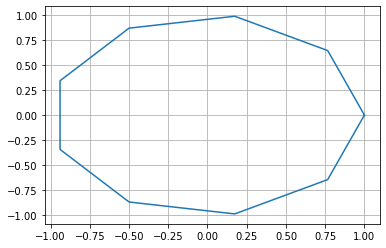

ValueError: Unknown projection '3d'

<Figure size 288x288 with 0 Axes>

In [8]:
# trayectoria de recta
def main():
    #simulator
    sim = simulation.create_simulation("robotModelV2.xml")

    #controllers
    # controller = Manipulator_Agent("../agents_old/ddpg4/pyt_save/model.pt", sim, 4, render=False)
    controller = Manipulator_Agent("./agents/agents1/pyt_save/model.pt", sim, 4, render=False)
    # controller = Manipulator_Agent("./agents/agent1/pyt_save/model.pt", sim, 4, render=True)

    theta = np.linspace(0, 2*np.pi, 10)

    r = np.sqrt(1.0)

    x1 = r*np.cos(theta)
    x2 = r*np.sin(theta)

    # data recollector
    logger = Logger()

    #init
    x =  [i/10 for i in range(-2,2)]
    y = x
    data = []

    for  i in range(len(theta)):
        position, qpos, control, obs = controller.move_to(np.array([-0.1, theta[i], 0.5]), distance_threshold=0.05, timer=1000)
        data.append(position["pos_y"][-1])


    # logger.plot_trajectory(x, data, grid=True, title="posicion en y")
    # logger.plot_trajectory(x, data2, grid=True, title=" accion de control")
    # logger.plot_error(y, error_a=position["pos_y"], error_b=error_a, grid=True)
    logger.plot_trajectory(x1, x2, grid=True)

    logger.show()

    fig = plt.figure(figsize=(4,4))

    ax = fig.add_subplot(111, projection='3d')

    glfw.terminate()

main()

In [ ]:
# test simulation

sim = simulation.create_simulation("robotModelV2.xml")


def reset_target(target):
    """
    Esta función resetea para la posición del goal de manera aleatoria.
    """

    #posiciono  el target en la simulación
    simulation_positions = sim.model.geom_pos.copy()
    simulation_positions[1] = target
    sim.model.geom_pos[:] = simulation_positions


viewer = simulation.create_viewer(sim)
sim.forward()


for _ in range(1000000000):
    
    viewer.render()
    
    left_finger = sim.data.get_body_xpos("left_inner_finger").astype(np.float32)
    right_finger = sim.data.get_body_xpos("right_inner_finger").astype(np.float32)

    gripper_position = ((left_finger[0] + right_finger[0])/2, (left_finger[1] + right_finger[1])/2, (left_finger[2] + right_finger[2])/2)

    reset_target(gripper_position)
    sim.data.ctrl[:] = 0.1
    sim.step()
    

In [2]:
sim = simulation.create_simulation("robotModelV3.xml")
viewer = mujoco_py.MjViewer(sim)


init_qpos = [-549.9, -50, 0 ,5, 0, 0]
init_qvel = [0,0,0,0,0,0]

sim.data.qpos[:] = init_qpos
sim.data.qvel[:] = init_qvel

while(True):
    sim.forward()
    viewer.render()

glfw.terminate()


Creating window glfw


SystemExit: 0

/home/alexis/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3351: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [1]:
from spinup.utils.run_utils import ExperimentGrid
from spinup import ddpg_pytorch
import torch

if __name__ == "__main__":
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("--cpu", type=int, default=3)
    parser.add_argument('--num_runs', type=int, default=3)
    args = parser.parse_args()
    
    eg = ExperimentGrid(name='ppo_test')
    eg.add('env_name', 'CartPole-v0', '',True)
    eg.add('seed',[10*i for i in range(args.num_runs)])
    eg.add('epochs',2)
    eg.add('steps_per_epoch',2000)
    eg.add('ac_kwargs:hidden_sizes', [(32,),(64,64)],'hid')
    eg.add('ac_kwargs:activation',[torch.nn.Tanh, torch.nn.ReLU],'')
    eg.add(ddpg_pytorch, num_runs=args.cpu)

usage: ipykernel_launcher.py [-h] [--cpu CPU] [--num_runs NUM_RUNS]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/alexis/.local/share/jupyter/runtime/kernel-2c59fbf3-373f-4e25-9829-f83c7a1246f0.json


SystemExit: 2

/home/alexis/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3351: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
